### **Import Necessary Libraries**

In [148]:
import pandas as pd
import matplotlib.pyplot as plt
import os
pd.options.mode.chained_assignment=None

**Task 1- Merge the 12 months of sales data into a single csv file**

In [16]:
files=[file for file in os.listdir('./sales_Data')]
all_months_data=pd.DataFrame()

for file in files:
    df=pd.read_csv('./sales_Data/'+file)
    all_months_data=pd.concat([all_months_data,df])
    
all_months_data.to_csv('All sales data.csv',index=False)

**Read in updated dataframe**

In [51]:
wrong_entries=['Order ID','Product','Quantity Ordered','Price Each','Order Date','Purchase Address']
sales=pd.read_csv('All sales data.csv',na_values=wrong_entries)
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559.0,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [52]:
#Deleting rows with NULL values and also those wrong entries which are converted to null values above! 
sales=sales.dropna()

In [59]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [56]:
sales.dtypes

Order ID            float64
Product              object
Quantity Ordered    float64
Price Each          float64
Order Date           object
Purchase Address     object
dtype: object

### Q.1- What was the best month for sales? how much was earned that month?

In [118]:
#In sales dataframe 'order date' column is in object datatype so we have to convert it into datetime format 

sales['Order Date'] = pd.to_datetime(sales['Order Date'], dayfirst=False)

In [61]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001"
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215"
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001"
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001"
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016"
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016"


In [119]:
#Extract month from 'order date'

sales['order month']=sales['Order Date'].dt.month

In [63]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4
...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9


In [120]:
# calculating amount from unit ordered and each price

sales['amount']=sales['Quantity Ordered']*sales['Price Each']

In [78]:
sales

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99
...,...,...,...,...,...,...,...,...
186845,259353.0,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97
186846,259354.0,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00
186847,259355.0,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00
186848,259356.0,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99


In [83]:
#grouping order month

monthly_amount=sales.groupby('order month').sum()

In [84]:
monthly_amount

,Order ID,Quantity Ordered,Price Each,amount
order month,,,,
1,1.421631e+09,10903.0,1811768.38,1822256.73
2,1.871053e+09,13449.0,2188884.72,2202022.42
3,2.564811e+09,17005.0,2791207.83,2807100.38
4,3.387347e+09,20558.0,3367671.02,3390670.24
5,3.345872e+09,18667.0,3135125.13,3152606.75
6,2.932976e+09,15253.0,2562025.61,2577802.26
7,3.284140e+09,16072.0,2632539.56,2647775.76
8,2.899374e+09,13448.0,2230345.42,2244467.88
9,2.948727e+09,13109.0,2084992.09,2097560.13


In [100]:
#obtain month number with maximum amount of sales

monthly_amount[monthly_amount['amount']==monthly_amount['amount'].max()]['amount']

order month
12    4613443.34
Name: amount, dtype: float64

<AxesSubplot:xlabel='order month', ylabel='Sales'>

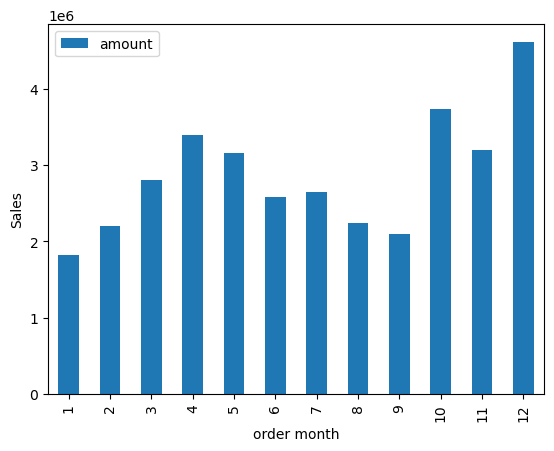

In [98]:
#Visualizing sales per month data by bar graph

monthly_amount['amount'].plot(ylabel='Sales',kind='bar',legend=True)

# Conclusion

## So, here we conclude that the best month for sales was december, and 46,13,443.34 was earned in december month.

......

### Q.2- Which city had the heighest number of sales?

In [101]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99


In [121]:
#Extracting city and state name from 'purchase address'

sales['city']=sales['Purchase Address'].apply(lambda x: x.split(',')[1] +' '+ x.split(',')[2].split(' ')[1])

In [122]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [109]:
#Grouping city sales

city_sales=sales.groupby('city').sum()

In [110]:
city_sales

,Order ID,Quantity Ordered,Price Each,order month,amount
city,,,,,
Atlanta GA,3.423838e+09,16602.0,2779908.20,104794,2795498.58
Austin TX,2.280982e+09,11153.0,1809873.61,69829,1819581.75
Boston MA,4.598265e+09,22528.0,3637409.77,141112,3661642.01
Dallas TX,3.415644e+09,16730.0,2752627.82,104620,2767975.40
Los Angeles CA,6.811085e+09,33289.0,5421435.23,208325,5452570.80
New York City NY,5.736334e+09,27932.0,4635370.83,175741,4664317.43
Portland ME,5.632663e+08,2750.0,447189.25,17144,449758.27
Portland OR,2.305595e+09,11303.0,1860558.22,70621,1870732.34
San Francisco CA,1.030444e+10,50239.0,8211461.74,315520,8262203.91


In [116]:
#obtain city with maximum amount of sales

city_sales[city_sales['amount']==city_sales['amount'].max()]['amount']

city
 San Francisco CA    8262203.91
Name: amount, dtype: float64

<AxesSubplot:xlabel='city', ylabel='Sales'>

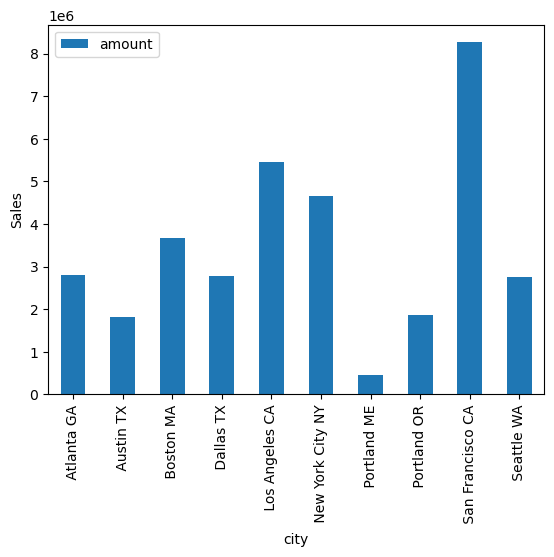

In [123]:
#Visualizing sales according to city sales by bar graph

city_sales['amount'].plot(kind='bar',ylabel='Sales',legend=True)

# Conclusion

## So, we conclude that San Francisco CA had the heighest number of sales.

......

### Q.3- What time should we display advertisements to maximize likelihood of customer's buying products?

In [124]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [151]:
#Extracting and Creating hour column from order date 

sales['hour']=sales['Order Date'].dt.hour

In [152]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city,hour
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [181]:
#grouping hourly ordered placed

hourly_sale=sales.groupby('hour').count()

In [182]:
hourly_sale

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city
hour,,,,,,,,,
0,3910,3910,3910,3910,3910,3910,3910,3910,3910
1,2350,2350,2350,2350,2350,2350,2350,2350,2350
2,1243,1243,1243,1243,1243,1243,1243,1243,1243
3,831,831,831,831,831,831,831,831,831
4,854,854,854,854,854,854,854,854,854
5,1321,1321,1321,1321,1321,1321,1321,1321,1321
6,2482,2482,2482,2482,2482,2482,2482,2482,2482
7,4011,4011,4011,4011,4011,4011,4011,4011,4011
8,6256,6256,6256,6256,6256,6256,6256,6256,6256


<AxesSubplot:xlabel='Hour', ylabel='Order Placed'>

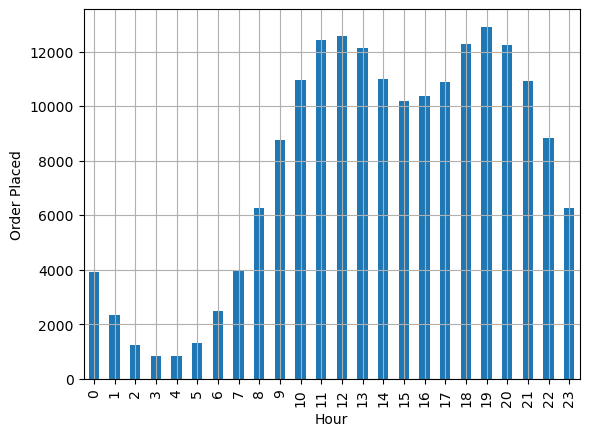

In [183]:
#Visualizing Quantity Ordered with repect to Hours

hourly_sale['Quantity Ordered'].plot(xlabel='Hour',ylabel='Order Placed',kind='bar',grid=True)

# Conclusion

### The above bar graph shows that the peak time is 19:00 and 12:00 as the most of the order are placed that time.,
## So, we conclude that the best time for displaying advertisement will be 19:00 & 11:00 - 12:00

.....

### Q.4- what products are most often sold together?

In [186]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city,hour
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [190]:
#Creating dataframe which contains all the duplicate Order ID

df=sales[sales['Order ID'].duplicated(keep=False)]

In [191]:
df.head(10)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city,hour
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574.0,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574.0,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
31,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
32,176586.0,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17
33,176586.0,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17
119,176672.0,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11
120,176672.0,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11


In [194]:
#Grouping the products with the same Order ID

df['products group']=df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))

In [196]:
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city,hour,products group
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574.0,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574.0,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [199]:
#Deleting Duplicate rows

df=df[['Order ID','products group']].drop_duplicates()

In [200]:
df

,Order ID,products group
3,176560.0,"Google Phone,Wired Headphones"
18,176574.0,"Google Phone,USB-C Charging Cable"
30,176585.0,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586.0,"AAA Batteries (4-pack),Google Phone"
119,176672.0,"Lightning Charging Cable,USB-C Charging Cable"
...,...,...
186781,259296.0,"Apple Airpods Headphones,Apple Airpods Headphones"
186783,259297.0,"iPhone,Lightning Charging Cable,Lightning Char..."
186791,259303.0,"34in Ultrawide Monitor,AA Batteries (4-pack)"
186803,259314.0,"Wired Headphones,AAA Batteries (4-pack)"


In [203]:
#Counting pair of products

grouped=df.groupby('products group').count()

In [204]:
grouped

,Order ID
products group,
"20in Monitor,20in Monitor",3
"20in Monitor,27in FHD Monitor",2
"20in Monitor,34in Ultrawide Monitor",1
"20in Monitor,AA Batteries (4-pack)",6
"20in Monitor,AAA Batteries (4-pack)",3
...,...
"iPhone,USB-C Charging Cable",12
"iPhone,Vareebadd Phone",3
"iPhone,Wired Headphones",361


In [212]:
#Getting pair of products with the largest number of orders

grouped['Order ID'].nlargest(10)

products group
iPhone,Lightning Charging Cable                       882
Google Phone,USB-C Charging Cable                     856
iPhone,Wired Headphones                               361
Vareebadd Phone,USB-C Charging Cable                  312
Google Phone,Wired Headphones                         303
iPhone,Apple Airpods Headphones                       286
Google Phone,Bose SoundSport Headphones               161
Vareebadd Phone,Wired Headphones                      104
Google Phone,USB-C Charging Cable,Wired Headphones     77
Vareebadd Phone,Bose SoundSport Headphones             60
Name: Order ID, dtype: int64

# Conclusion

## Here, we observed that iPhone and Lightning Charging Cable are most often sold together.
## And if we talk about three products then Google Phone,USB-C Charging Cable and Wired Headphones are most often sold together.

......

### Q.5- What product sold the most? Why do you think it sold the most?

In [213]:
sales.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,order month,amount,city,hour
0,176558.0,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559.0,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560.0,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560.0,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561.0,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [241]:
#Calculating total Quantity Ordered for each product

products=sales.groupby('Product').sum()

In [242]:
products

,Order ID,Quantity Ordered,Price Each,order month,amount,hour
Product,,,,,,
20in Monitor,9.508897e+08,4129.0,451068.99,29336,454148.71,58764
27in 4K Gaming Monitor,1.442589e+09,6244.0,2429637.70,44440,2435097.56,90916
27in FHD Monitor,1.724224e+09,7550.0,1125974.93,52558,1132424.50,107540
34in Ultrawide Monitor,1.418986e+09,6199.0,2348718.19,43304,2355558.01,89076
AA Batteries (4-pack),4.744174e+09,27635.0,79015.68,145558,106118.40,298342
AAA Batteries (4-pack),4.764959e+09,31017.0,61716.59,146370,92740.83,297332
Apple Airpods Headphones,3.579120e+09,15661.0,2332350.00,109477,2349150.00,223304
Bose SoundSport Headphones,3.071496e+09,13457.0,1332366.75,94113,1345565.43,192445
Flatscreen TV,1.110943e+09,4819.0,1440000.00,34224,1445700.00,68815


In [243]:
#Finding Product with maximum number of orders

products[products['Quantity Ordered']==products['Quantity Ordered'].max()]['Quantity Ordered']

Product
AAA Batteries (4-pack)    31017.0
Name: Quantity Ordered, dtype: float64

**Here, we saw that AAA Batteries (4-pack) Sold the most.**

**But why? let's find this based on price of each products!**

In [244]:
#Calculating price for each products

product_price=sales.groupby('Product').mean()

In [245]:
product_price

,Order ID,Quantity Ordered,Price Each,order month,amount,hour
Product,,,,,,
20in Monitor,231867.752012,1.006828,109.99,7.153377,110.740968,14.329188
27in 4K Gaming Monitor,231555.156982,1.002247,389.99,7.133226,390.866382,14.593258
27in FHD Monitor,229682.129080,1.005728,149.99,7.001199,150.849141,14.325296
34in Ultrawide Monitor,229572.229089,1.002912,379.99,7.005986,381.096588,14.411260
AA Batteries (4-pack),230557.123876,1.343004,3.84,7.073820,5.157137,14.498809
AAA Batteries (4-pack),230849.254978,1.502689,2.99,7.091226,4.493040,14.404922
Apple Airpods Headphones,230183.297833,1.007203,150.00,7.040774,151.080455,14.361309
Bose SoundSport Headphones,230506.278124,1.009906,99.99,7.062889,100.980520,14.442402
Flatscreen TV,231446.501458,1.003958,300.00,7.130000,301.187500,14.336458


In [247]:
#Finding product with minimum price

product_price[product_price['Price Each']==product_price['Price Each'].min()]['Price Each']

Product
AAA Batteries (4-pack)    2.99
Name: Price Each, dtype: float64

**Here, we saw that AAA Batteries (4-pack) has minimum price also.**

<AxesSubplot:xlabel='Product', ylabel='price'>

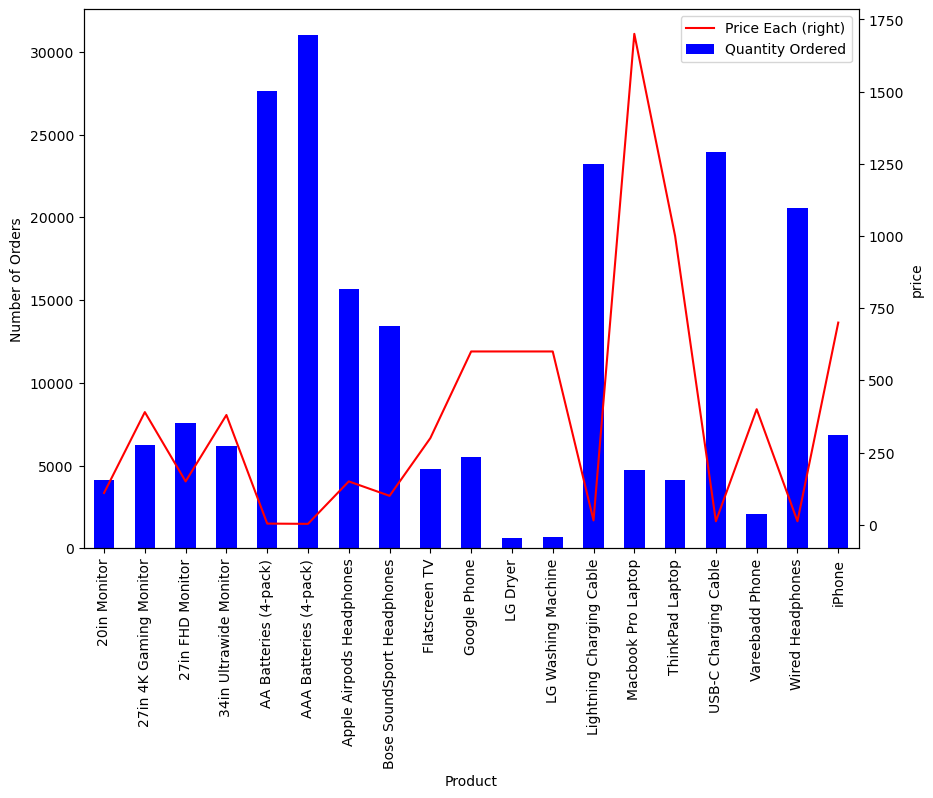

In [291]:
# Plotting graph for both 'price each' and 'Quantity Odered' for products

#line graph for Price Each
ax=product_price['Price Each'].plot(secondary_y=True,color='r',rot=90,ylabel='Number of Orders',legend=True)
#bar graph for Quantity Ordered
products.plot(y='Quantity Ordered',kind='bar',color='b',ylabel='price',figsize=(10,7),ax=ax)

# Conclusion

## Hence, we Conclude that the product with most number of sales is AAA Batteries (4-pack) and AA Batteries (4-pack) because the price of the products is very low as anyone can buy it without having the much funds also batteries are the one of the most used item among the electronic gadgets.